<a href="https://colab.research.google.com/github/Shreeranga1/TimeSeries/blob/main/timeSeriesSession3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np

In [72]:
df=pd.read_csv('https://raw.githubusercontent.com/Shreeranga1/TimeSeries/main/AirTemp.csv',parse_dates=True)

In [73]:
df.tail()

,Year,Month,AvgTemp
235,1939,Aug,61.8
236,1939,Sep,58.2
237,1939,Oct,46.7
238,1939,Nov,46.6
239,1939,Dec,37.8


In [74]:
date_range=pd.date_range(start='1/1/1920',end='31/12/1939',freq='M')

In [75]:
df['TimeIndex']=date_range

In [76]:
df.drop(columns=['Year','Month'],axis=1,inplace=True)

In [77]:
df.set_index(df.TimeIndex,inplace=True)

In [78]:
df.drop(columns=['TimeIndex'],inplace=True)

In [79]:
df.head()

,AvgTemp
TimeIndex,
1920-01-31,40.6
1920-02-29,40.8
1920-03-31,44.4
1920-04-30,46.7
1920-05-31,54.1


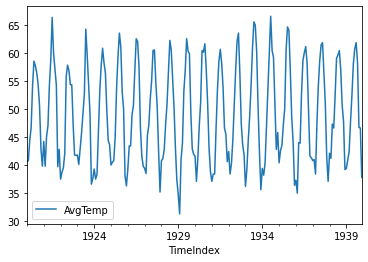

In [80]:
df.plot()

# Check the stationarity

In [81]:
observations=df.values

In [82]:
from statsmodels.tsa.stattools         import  adfuller

In [83]:
observations= df.values
test_result = adfuller(df.AvgTemp)

In [84]:
test_result[1]<0.05

True

## ACF and PACF

In [85]:
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf

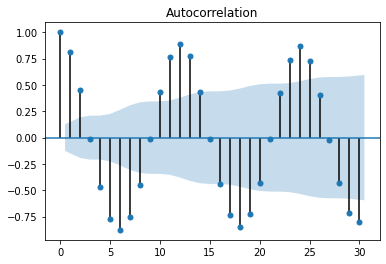

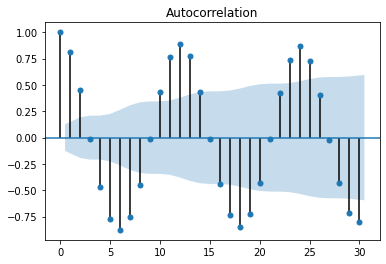

In [86]:
plot_acf(df,lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


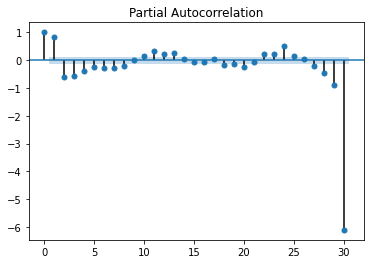

In [87]:
plot_pacf(df,lags=30);

Split the data into train and test 

In [88]:
from   datetime                        import  datetime, timedelta

In [89]:
train_end=datetime(1935,12,31)
test_end=datetime(1939,12,31)

In [90]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

# Build ARMA

In [91]:
from statsmodels.tsa.arima_model import ARMA

In [92]:
model=ARMA(train,(2,3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


# Predictons

In [94]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [ ]:
predictions=model_fit.predict(start=pred_start, end=pred_end)
